In [1]:
import xarray as xr
import rasterio as rio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Creating ascii fluxes

In [2]:
fluxes = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/vic_results/nc_fluxes.2001-04-01.nc")

In [4]:
fluxes_subset = fluxes[['OUT_PREC', 'OUT_EVAP', 'OUT_RUNOFF', 'OUT_BASEFLOW', 'OUT_WDEW', 'OUT_SOIL_LIQ', 'OUT_SOIL_MOIST']]
fluxes_subset

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237, nlayer: 2, time: 7376)
Coordinates:
  * time            (time) datetime64[ns] 2001-04-01 2001-04-02 ... 2021-06-10
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
Dimensions without coordinates: nlayer
Data variables:
    OUT_PREC        (time, lat, lon) float32 ...
    OUT_EVAP        (time, lat, lon) float32 ...
    OUT_RUNOFF      (time, lat, lon) float32 ...
    OUT_BASEFLOW    (time, lat, lon) float32 ...
    OUT_WDEW        (time, lat, lon) float32 ...
    OUT_SOIL_LIQ    (time, nlayer, lat, lon) float32 ...
    OUT_SOIL_MOIST  (time, nlayer, lat, lon) float32 ...
Attributes:
    title:               VIC History File
    source:              VIC Image Driver
    history:             Created by skahmad on f-hossain-4.ce.washington.edu ...
    references:          Primary Historical Reference for VIC: Liang, X., D. ...
    comment:             Output from the Variable Infiltration Capacity (VIC)...
    Conventions:         CF-1.6
    netcdf_lib_version:  4.7.4 of Dec 14 2020 16:14:56 $
    mpi_lib_version:     MPICH Version:\t3.4.2\nMPICH Release date:\tWed May ...
    VIC_Model_Version:   5.0.1 February 1, 2017
    VIC_GIT_VERSION:     ebed-dirty
    VIC_Driver:          Image

In [6]:
fluxes_subset.expand_dims(dim='nlayer')

ValueError: Dimension nlayer already exists.

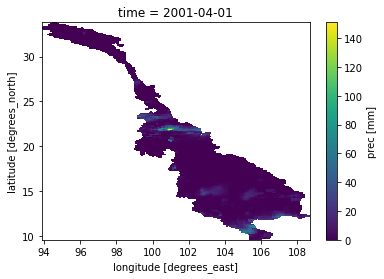

In [45]:
mask = fluxes_subset.OUT_PREC.isel(time=0)
mask.plot()

In [102]:
fluxes_subset

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237, nlayer: 2, time: 7376)
Coordinates:
  * time            (time) datetime64[ns] 2001-04-01 2001-04-02 ... 2021-06-10
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
Dimensions without coordinates: nlayer
Data variables:
    OUT_PREC        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    OUT_EVAP        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    OUT_RUNOFF      (time, lat, lon) float32 ...
    OUT_BASEFLOW    (time, lat, lon) float32 ...
    OUT_WDEW        (time, lat, lon) float32 ...
    OUT_SOIL_LIQ    (time, nlayer, lat, lon) float32 ...
    OUT_SOIL_MOIST  (time, nlayer, lat, lon) float32 ...
Attributes:
    title:               VIC History File
    source:              VIC Image Driver
    history:             Created by skahmad on f-hossain-4.ce.washington.edu ...
    references:          Primary Historical Reference for VIC: Liang, X., D. ...
    comment:             Output from the Variable Infiltration Capacity (VIC)...
    Conventions:         CF-1.6
    netcdf_lib_version:  4.7.4 of Dec 14 2020 16:14:56 $
    mpi_lib_version:     MPICH Version:\t3.4.2\nMPICH Release date:\tWed May ...
    VIC_Model_Version:   5.0.1 February 1, 2017
    VIC_GIT_VERSION:     ebed-dirty
    VIC_Driver:          Image

In [3]:
# import math
# import os
# import pandas as pd
# import csv

# d = "/houston2/pritam/rat_mekong_v3/backend/data/rout_input"

# YEAR = np.array([int(pd.to_datetime(t).strftime("%Y")) for t in fluxes_subset.time.values])
# MONTH = np.array([int(pd.to_datetime(t).strftime("%m")) for t in fluxes_subset.time.values])
# DAY = np.array([int(pd.to_datetime(t).strftime("%d")) for t in fluxes_subset.time.values])


# nonnans = fluxes_subset.OUT_PREC.isel(time=0).values.flatten()
# nonnans = nonnans[~np.isnan(nonnans)]

# with tqdm(total=len(nonnans)) as pbar:
#     for lat in range(len(fluxes_subset.lat)):
#         for lon in range(len(fluxes_subset.lon)):
#             if not math.isnan(fluxes_subset.OUT_PREC.isel(time=0, lat=lat, lon=lon).values):
#                 pbar.set_description(f"{lat:03}, {lon:03}")
#                 fname = os.path.join(d, f"fluxes_{fluxes_subset.lat[lat].values:.3f}_{fluxes_subset.lon[lon].values:.3f}")

#                 da = fluxes_subset.isel(lat=lat, lon=lon, nlayer=0).to_dataframe().reset_index()
#                 # da['time'] = da['time'].apply(lambda x: x.strftime("%Y\t%m\t%d"))

#                 da.to_csv(fname, sep=' ', header=False, index=False, float_format="%.5f", quotechar="", quoting=csv.QUOTE_NONE, date_format="%Y %m %d", escapechar=" ")
#                 # csv.to_csv(da, fname, nogil=True, sep='\t', header=False, index=False, date_format="%Y\t%m\t%d", float_format="%.5f", quoting=False)

#                 # # print(TIME.apply(lambda x: x.strftime("%Y\t%m\t%d")))
#                 # OUT_PREC = fluxes_subset.OUT_PREC.isel(lat=lat, lon=lon).values
#                 # OUT_EVAP = fluxes_subset.OUT_EVAP.isel(lat=lat, lon=lon).values
#                 # OUT_RUNOFF = fluxes_subset.OUT_RUNOFF.isel(lat=lat, lon=lon).values
#                 # OUT_BASEFLOW = fluxes_subset.OUT_BASEFLOW.isel(lat=lat, lon=lon).values
#                 # OUT_WDEW = fluxes_subset.OUT_WDEW.isel(lat=lat, lon=lon).values
#                 # OUT_SOIL_LIQ = fluxes_subset.OUT_SOIL_LIQ.isel(lat=lat, lon=lon).values
#                 # OUT_SOIL_MOIST = fluxes_subset.OUT_SOIL_MOIST.isel(lat=lat, lon=lon).values
#                 # 
#                 # data = np.array([YEAR, MONTH, DAY, OUT_PREC, OUT_EVAP, OUT_RUNOFF, OUT_BASEFLOW, OUT_WDEW, OUT_SOIL_LIQ, OUT_SOIL_MOIST])
#                 # print(data)
#                 # with open(fname, "w") as f:
#                 #     np.savetxt(f, data )
#                 # input()
#                 pbar.update(1)

# Station file

In [10]:
# Calculate station x and y index from lower left corner
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

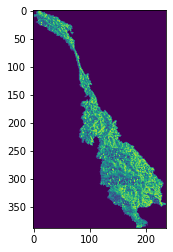

In [11]:
fdr_ds = rio.open("/houston2/pritam/rat_mekong_v3/extras/fallback_routing/DRT_FDR_VIC.asc")
fdr_ar = fdr_ds.read(1)
plt.imshow(fdr_ar)

In [14]:
fdr_ds.height

388

In [13]:
fdr_ar.shape

(388, 237)

In [49]:
stations = pd.read_csv("/houston2/pritam/rat_mekong_v3/extras/fallback_routing/stations_latlon.csv")
stations

,run,name,lon,lat
0,1,nam_ngum,102.547577,18.531068
1,1,nam_ngum,102.547577,18.531068


In [50]:
def get_xy(lat, lon, fdr_ds):
    max_x = fdr_ds.width
    max_y = fdr_ds.height
    
    row, col = fdr_ds.index(lon, lat)
    row = max_y - row
    return row, col

In [51]:
get_xy(18.531068, 102.547577, fdr_ds)

(144, 138)

In [55]:
stations['x'] = None
stations['y'] = None
stations['filler'] = -9999
stations[['y', 'x']] = stations.apply(lambda row: pd.Series(get_xy(row['lat'], row['lon'], fdr_ds), index=['x', 'y']), axis=1)
# xy_df
stations

,run,name,lon,lat,x,y,filler
0,1,nam_ngum,102.547577,18.531068,138,144,-9999
1,1,nam_ngum,102.547577,18.531068,138,144,-9999


In [57]:
res_df = "/houston2/pritam/rat_mekong_v3/extras/fallback_routing/stations_xy.txt"

stations[['run', 'name', 'x', 'y', 'filler']].to_csv(res_df, sep='\t', header=False, index=False, line_terminator='\nNONE\n')

## Fixing alternate lat longs not working

In [38]:
fluxes_subset.lat.values

array([33.781, 33.719, 33.656, 33.594, 33.531, 33.469, 33.406, 33.344,
       33.281, 33.219, 33.156, 33.094, 33.031, 32.969, 32.906, 32.844,
       32.781, 32.719, 32.656, 32.594, 32.531, 32.469, 32.406, 32.344,
       32.281, 32.219, 32.156, 32.094, 32.031, 31.969, 31.906, 31.844,
       31.781, 31.719, 31.656, 31.594, 31.531, 31.469, 31.406, 31.344,
       31.281, 31.219, 31.156, 31.094, 31.031, 30.969, 30.906, 30.844,
       30.781, 30.719, 30.656, 30.594, 30.531, 30.469, 30.406, 30.344,
       30.281, 30.219, 30.156, 30.094, 30.031, 29.969, 29.906, 29.844,
       29.781, 29.719, 29.656, 29.594, 29.531, 29.469, 29.406, 29.344,
       29.281, 29.219, 29.156, 29.094, 29.031, 28.969, 28.906, 28.844,
       28.781, 28.719, 28.656, 28.594, 28.531, 28.469, 28.406, 28.344,
       28.281, 28.219, 28.156, 28.094, 28.031, 27.969, 27.906, 27.844,
       27.781, 27.719, 27.656, 27.594, 27.531, 27.469, 27.406, 27.344,
       27.281, 27.219, 27.156, 27.094, 27.031, 26.969, 26.906, 26.844,
      

In [69]:
fluxes_subset['lat'] = fluxes_subset.lat.values.round(2)
fluxes_subset['lon'] = fluxes_subset.lon.values.round(2)

In [27]:
# np.floor(fluxes_subset.lon.values, 2)
a = 9.595

print(f"{a:.2f}")
print(np.array(a).round(2))

9.60
9.6


In [70]:
fluxes_subset

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237, nlayer: 2, time: 7376)
Coordinates:
  * time            (time) datetime64[ns] 2001-04-01 2001-04-02 ... 2021-06-10
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.72 9.66 9.59
Dimensions without coordinates: nlayer
Data variables:
    OUT_PREC        (time, lat, lon) float32 ...
    OUT_EVAP        (time, lat, lon) float32 ...
    OUT_RUNOFF      (time, lat, lon) float32 ...
    OUT_BASEFLOW    (time, lat, lon) float32 ...
    OUT_WDEW        (time, lat, lon) float32 ...
    OUT_SOIL_LIQ    (time, nlayer, lat, lon) float32 ...
    OUT_SOIL_MOIST  (time, nlayer, lat, lon) float32 ...
Attributes:
    title:               VIC History File
    source:              VIC Image Driver
    history:             Created by skahmad on f-hossain-4.ce.washington.edu ...
    references:          Primary Historical Reference for VIC: Liang, X., D. ...
    comment:             Output from the Variable Infiltration Capacity (VIC)...
    Conventions:         CF-1.6
    netcdf_lib_version:  4.7.4 of Dec 14 2020 16:14:56 $
    mpi_lib_version:     MPICH Version:\t3.4.2\nMPICH Release date:\tWed May ...
    VIC_Model_Version:   5.0.1 February 1, 2017
    VIC_GIT_VERSION:     ebed-dirty
    VIC_Driver:          Image

In [28]:
# recalc lat-lon
fdr = rio.open("DRT_FDR_VIC.asc")
fdr

<open DatasetReader name='DRT_FDR_VIC.asc' mode='r'>

In [80]:
import math

np.array(list(map(lambda x: math.floor(x * 10 ** 2) / 10 ** 2, fluxes_subset.lat.values)))

array([33.78, 33.71, 33.65, 33.59, 33.53, 33.46, 33.4 , 33.34, 33.28,
       33.21, 33.15, 33.09, 33.03, 32.96, 32.9 , 32.84, 32.78, 32.71,
       32.65, 32.59, 32.53, 32.46, 32.4 , 32.34, 32.28, 32.21, 32.15,
       32.09, 32.03, 31.96, 31.9 , 31.84, 31.78, 31.71, 31.65, 31.59,
       31.53, 31.46, 31.4 , 31.34, 31.28, 31.21, 31.15, 31.09, 31.03,
       30.96, 30.9 , 30.84, 30.78, 30.71, 30.65, 30.59, 30.53, 30.46,
       30.4 , 30.34, 30.28, 30.21, 30.15, 30.09, 30.03, 29.96, 29.9 ,
       29.84, 29.78, 29.71, 29.65, 29.59, 29.53, 29.46, 29.4 , 29.34,
       29.28, 29.21, 29.15, 29.09, 29.03, 28.96, 28.9 , 28.84, 28.78,
       28.71, 28.65, 28.59, 28.53, 28.46, 28.4 , 28.34, 28.28, 28.21,
       28.15, 28.09, 28.03, 27.96, 27.9 , 27.84, 27.78, 27.71, 27.65,
       27.59, 27.53, 27.46, 27.4 , 27.34, 27.28, 27.21, 27.15, 27.09,
       27.03, 26.96, 26.9 , 26.84, 26.78, 26.71, 26.65, 26.59, 26.53,
       26.46, 26.4 , 26.34, 26.28, 26.21, 26.15, 26.09, 26.03, 25.96,
       25.9 , 25.84,

In [46]:
lll = fdr.bounds.left
llb = fdr.bounds.bottom
deltax, deltay = fdr.res
h, w = fdr.height, fdr.width

lll, llu, deltax, deltay


(93.875, 9.5625, 0.0625, 0.0625)

In [53]:
(llb + (deltay/2) + (np.arange(h) * deltay)).round(2)

array([ 9.59,  9.66,  9.72,  9.78,  9.84,  9.91,  9.97, 10.03, 10.09,
       10.16, 10.22, 10.28, 10.34, 10.41, 10.47, 10.53, 10.59, 10.66,
       10.72, 10.78, 10.84, 10.91, 10.97, 11.03, 11.09, 11.16, 11.22,
       11.28, 11.34, 11.41, 11.47, 11.53, 11.59, 11.66, 11.72, 11.78,
       11.84, 11.91, 11.97, 12.03, 12.09, 12.16, 12.22, 12.28, 12.34,
       12.41, 12.47, 12.53, 12.59, 12.66, 12.72, 12.78, 12.84, 12.91,
       12.97, 13.03, 13.09, 13.16, 13.22, 13.28, 13.34, 13.41, 13.47,
       13.53, 13.59, 13.66, 13.72, 13.78, 13.84, 13.91, 13.97, 14.03,
       14.09, 14.16, 14.22, 14.28, 14.34, 14.41, 14.47, 14.53, 14.59,
       14.66, 14.72, 14.78, 14.84, 14.91, 14.97, 15.03, 15.09, 15.16,
       15.22, 15.28, 15.34, 15.41, 15.47, 15.53, 15.59, 15.66, 15.72,
       15.78, 15.84, 15.91, 15.97, 16.03, 16.09, 16.16, 16.22, 16.28,
       16.34, 16.41, 16.47, 16.53, 16.59, 16.66, 16.72, 16.78, 16.84,
       16.91, 16.97, 17.03, 17.09, 17.16, 17.22, 17.28, 17.34, 17.41,
       17.47, 17.53,